# Husky vs Poodle dog breed classifier

#### This is a binary classifer which classifies the two dog breeds namely huskies and poodle using CNN (convolutional neural networks).

#### The concept of ImageGenerator is used where we do not explicitly label the images as husky and poodle but the ImageGenerator will read the images from the subdirectories and automatically label them from the name of that subdirectory. 

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Explore the data

Using OS library to use the operating system libraries, giving access to the file system

In [0]:
import os

We have the base directory husky_poodle_data, which contains train and validation subdirectories for the training and validation datasets, which in turn each contain husky and poodle subdirectories.

In [0]:
# Next we will define the directories where the images are present
base_dir='/content/drive/My Drive/Projects/husky vs poodle/husky_poodle_data'

# Directory with the training and validation examples
train_dir = os.path.join(base_dir, 'train')

validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training husky pictures
train_husky_dir= os.path.join(train_dir,'husky')

# Directory with our training poodle pictures
train_poodle_dir= os.path.join(train_dir,'poodle')

# Directory with our testing husky pictures
validation_husky_dir= os.path.join(validation_dir,'husky')

# Directory with our testing poodle pictures
validation_poodle_dir= os.path.join(validation_dir,'poodle')

Analyzing what the filenames look like in the husky and poodle training and testing directories

In [36]:
train_husky_names =os.listdir(train_husky_dir)
print(train_husky_names[:10])

train_poodle_names =os.listdir(train_poodle_dir)
print("\n",train_poodle_names[:10])

validation_husky_names =os.listdir(validation_husky_dir)
print("\n",validation_husky_names[:10])

validation_poodle_names =os.listdir(validation_poodle_dir)
print("\n",validation_poodle_names[:10])

['image20.jpeg', 'image28.jpeg', 'image14.jpeg', 'image12.jpeg', 'image19.jpeg', 'image21.jpeg', 'husky-humping.jpg', 'images20.jpg', 'images2.jpg', 'images12.jpg']

 ['image19.jpeg', 'images41.jpg', 'images26.jpg', '107768653_m.jpg', '65198-436x640-Poodle.jpg', 'images55.jpg', 'images81.jpg', 'images98.jpg', 'image20.jpeg', 'images80.jpg']

 ['siberian-husky-card-large.jpg', 'Siberian-Husky_1.jpg', 'siberian.jpg', 'original.jpg', 'siberian-husky-dog-breed-pictures-1.jpg', 'siberian-husky.jpg', 'Siberian-Husky-5-650x425.jpg', 'siberian-husky-4565849__340.jpg', 'white-and-black-siberian-husky-2853129.jpg', 'Siberian-Huskies-1.jpg']

 ['Toy-Poodle-5-650x425.jpg', 'poodle-658486.jpg', 'Poodle.jpg', 'poodle-names-1.jpg', 'poodle-card-small.jpg', 'Poodle-2.jpg', 'standard-poodle-brown-700x700.jpg', 'Standard-Poodle_600-2.jpg', 'puppy-3979350__340.jpg', 'images582.jpg']


Finding out the total number of husky and poodle images in the train and validation directories

In [37]:
print('total training husky images:', len(os.listdir(train_husky_dir)))
print('total training poodle images:', len(os.listdir(train_poodle_dir)))
print('total validation husky images:', len(os.listdir(validation_husky_dir)))
print('total validation poodle images:', len(os.listdir(validation_poodle_dir)))

total training husky images: 637
total training poodle images: 509
total validation husky images: 196
total validation poodle images: 199


Taking a look at a few pictures to get a better sense of what the husky and poodle datasets look like.

In [0]:
# Configuring matplot parameters
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph
# We will output the images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Displaying a batch of 8 huskies and 8 poodle images.

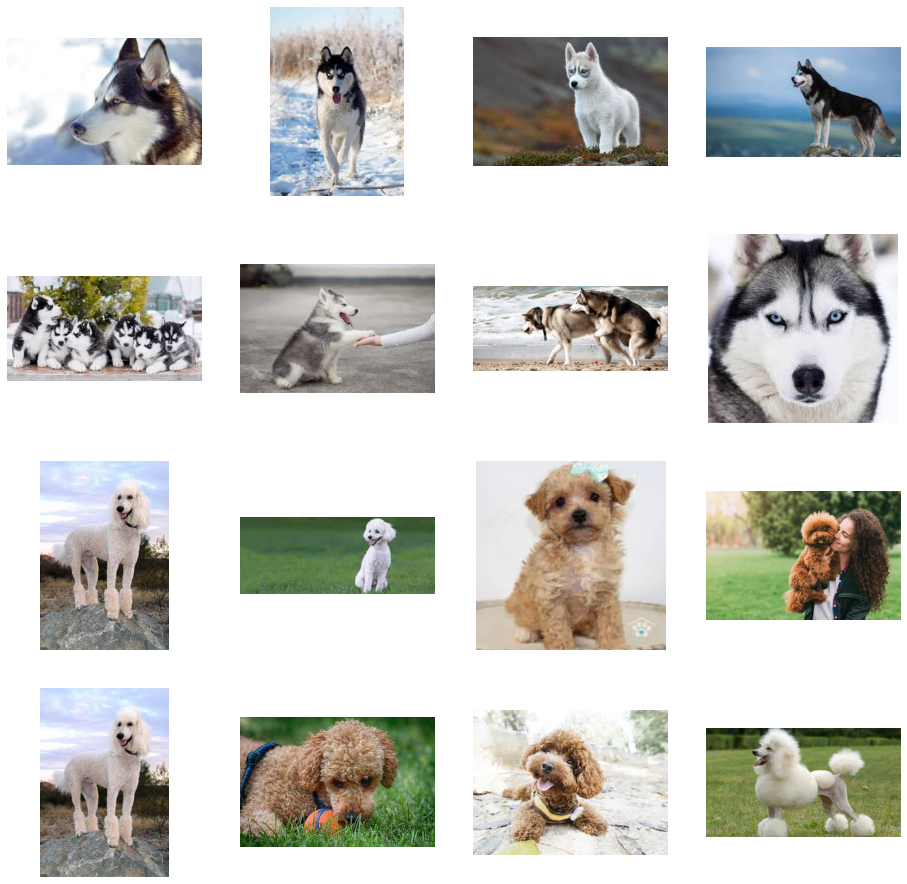

In [39]:
# Setting up the matplotlib fig and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows* 4)

pic_index += 8
next_husky_pic = [os.path.join(train_husky_dir, fname) 
                for fname in train_husky_names[pic_index-8:pic_index]]
next_poodle_pic = [os.path.join(train_poodle_dir, fname) 
                for fname in train_poodle_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_husky_pic + next_poodle_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Building the model

In [0]:
# Importing tensorflow
import tensorflow as tf

In [0]:
# Define a Callback class that stops training once accuracy reaches 97.0%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.99):
            print("\nReached 99.0% accuracy so cancelling training!")
            self.model.stop_training = True

In [0]:
# Building model
model = tf.keras.models.Sequential([
    # Input shape is the desired size of the image 200x200 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for class ('husky') and 1 for the other ('poodle')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [43]:
# Printing the summary of the NN
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 33856)            

In [0]:
# Configuring the specification for model training
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['acc'])

## Data Preprocessing

Setting up the data genertors that will read pictures in the source folder, convert them to float32 tensors and feed them (with their labels) to the network

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Flow training images in batches of 12 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(200,200),  # All images will be resized to 200x200
        batch_size=64,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 10 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(200,200),
        batch_size=64,
        class_mode='binary')

Found 1146 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


## Training

In [46]:
callbacks = myCallback()
history = model.fit(train_generator,
      steps_per_epoch=18,  # 1146 images = batch_size * steps 
      epochs=20,
      validation_data=validation_generator,
      validation_steps=6,
      callbacks=[callbacks])# 396 images = batch_size * steps 

Epoch 1/20
18/18 [==============================] - 10s 545ms/step - loss: 2.4643 - acc: 0.5227 - val_loss: 0.6833 - val_acc: 0.5104
Epoch 2/20
18/18 [==============================] - 10s 555ms/step - loss: 0.7551 - acc: 0.6527 - val_loss: 0.6537 - val_acc: 0.5938
Epoch 3/20
18/18 [==============================] - 10s 530ms/step - loss: 0.5623 - acc: 0.7077 - val_loss: 0.6893 - val_acc: 0.5625
Epoch 4/20
18/18 [==============================] - 9s 521ms/step - loss: 0.5824 - acc: 0.7234 - val_loss: 0.4682 - val_acc: 0.7969
Epoch 5/20
18/18 [==============================] - 10s 560ms/step - loss: 0.5147 - acc: 0.7426 - val_loss: 0.5234 - val_acc: 0.7422
Epoch 6/20
18/18 [==============================] - 10s 550ms/step - loss: 0.4847 - acc: 0.7557 - val_loss: 0.4379 - val_acc: 0.8073
Epoch 7/20
18/18 [==============================] - 10s 547ms/step - loss: 0.5088 - acc: 0.7932 - val_loss: 0.4880 - val_acc: 0.7474
Epoch 8/20
18/18 [==============================] - 10s 572ms/step - l

## Running the model

Running a prediction using the model. This code will allow the user to choose 1 or more files from the file system, it will then upload them, and run them through the model, giving an indication of whether the dog is a husky or poodle.

In [49]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(200,200))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a husky")
    
  else:
    print(fn + " is a poodle")

Saving poodle-4557830_640.jpg to poodle-4557830_640.jpg
[0.]
poodle-4557830_640.jpg is a poodle


## Visualizing Intermediate Representations

visualizing how an input gets transformed as it goes through the convnet.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide


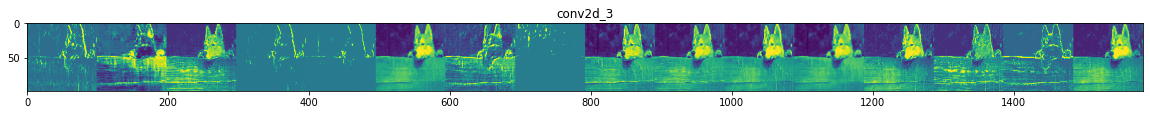

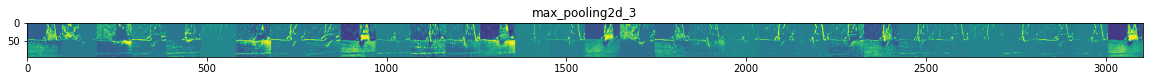

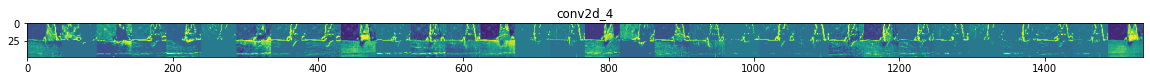

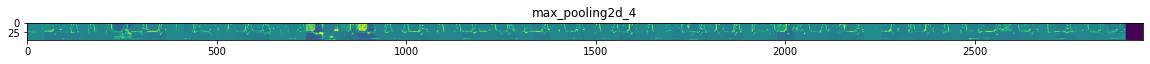

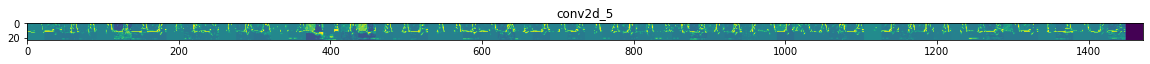

In [50]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
husky_img_files = [os.path.join(train_husky_dir, f) for f in train_husky_names]
poodle_img_files = [os.path.join(train_poodle_dir, f) for f in train_poodle_names]

img_path = random.choice(husky_img_files + poodle_img_files)
img = load_img(img_path, target_size=(200,200))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (200,200, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 200,200, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

## Evaluating Accuracy and Loss for the Model

Plotting the training/validation accuracy and loss as collected during training

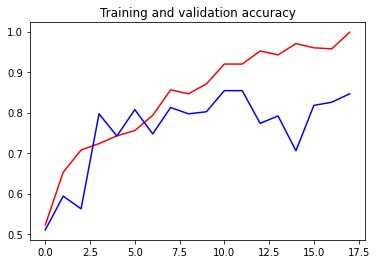

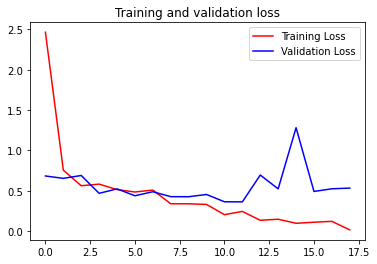

In [51]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

We can observe the problem of overfitting. The training accuracy gets close to 100% while validation accuracy stalls as 70%. So we will do data augmentation to fix the problem of everfitting.

## Training with data augmentation

In [52]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1.0/255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Flow training images in batches of 12 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(200,200),  # All images will be resized to 200x200
        batch_size=64,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 10 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(200,200),
        batch_size=64,
        class_mode='binary')

Found 1146 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


In [53]:
history = model.fit(train_generator,
      steps_per_epoch=18,  # 1146 images = batch_size * steps 
      epochs=100,
      validation_data=validation_generator,
      validation_steps=6)# 396 images = batch_size * steps 

Epoch 1/100
18/18 [==============================] - 20s 1s/step - loss: 0.7115 - acc: 0.7051 - val_loss: 0.5442 - val_acc: 0.6927
Epoch 2/100
18/18 [==============================] - 20s 1s/step - loss: 0.5732 - acc: 0.7251 - val_loss: 0.3937 - val_acc: 0.8203
Epoch 3/100
18/18 [==============================] - 21s 1s/step - loss: 0.4841 - acc: 0.7670 - val_loss: 0.3766 - val_acc: 0.8490
Epoch 4/100
18/18 [==============================] - 20s 1s/step - loss: 0.4652 - acc: 0.7836 - val_loss: 0.3325 - val_acc: 0.8516
Epoch 5/100
18/18 [==============================] - 20s 1s/step - loss: 0.4840 - acc: 0.7574 - val_loss: 0.4421 - val_acc: 0.7786
Epoch 6/100
18/18 [==============================] - 20s 1s/step - loss: 0.4783 - acc: 0.7696 - val_loss: 0.3607 - val_acc: 0.8594
Epoch 7/100
18/18 [==============================] - 19s 1s/step - loss: 0.4478 - acc: 0.7766 - val_loss: 0.3459 - val_acc: 0.8776
Epoch 8/100
18/18 [==============================] - 19s 1s/step - loss: 0.4421 - a

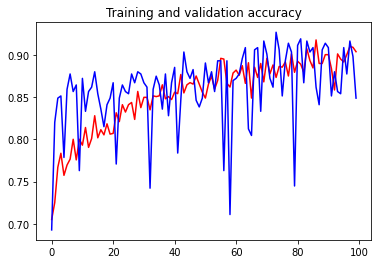

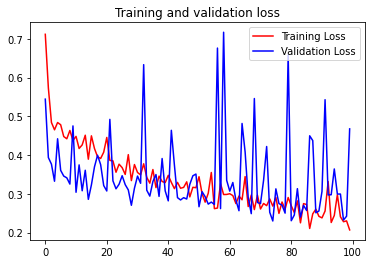

In [54]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()